In [41]:
#!pip install pmdarima

In [42]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from sklearn.metrics import mean_squared_error
##分解(decomposing) 可以用来把时序数据中的趋势和周期性数据都分离出来:
from statsmodels.tsa.seasonal import seasonal_decompose
#from pmdarima.arima import auto_arima
#from fbprophet import Prophet

from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [43]:
df= pd.read_csv('swiss_data.csv')
df=df.dropna(axis=1, how='all')
df=df.dropna(axis = 0, how = 'all')
df=df[6:]
ls=[ True,  True,  True,  True,  True, False,False]*82+[True,  True,  True,  True,  True, False]
df=df[ls]#remove weekend

In [44]:
df = df.reset_index(drop=True)
df.head(20)

,date,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,08-17-2020,Switzerland,2020-08-18 04:27:56,46.8182,8.2275,38252,1840,33300.0,3112.0,Switzerland,441.983690,4.810206
1,08-18-2020,Switzerland,2020-08-19 04:27:00,46.8182,8.2275,38449,1840,33500.0,3109.0,Switzerland,444.259932,4.785560
2,08-19-2020,Switzerland,2020-08-20 04:27:43,46.8182,8.2275,38760,1840,33500.0,3420.0,Switzerland,447.853389,4.747162
3,08-20-2020,Switzerland,2020-08-21 04:27:41,46.8182,8.2275,39026,1840,33900.0,3286.0,Switzerland,450.926892,4.714806
4,08-21-2020,Switzerland,2020-08-22 04:27:49,46.8182,8.2275,39332,1841,33900.0,3591.0,Switzerland,454.462577,4.680667
5,08-24-2020,Switzerland,2020-08-25 04:28:02,46.8182,8.2275,40060,1844,34400.0,3816.0,Switzerland,462.874271,4.603095
6,08-25-2020,Switzerland,2020-08-26 04:28:11,46.8182,8.2275,40262,1844,34400.0,4018.0,Switzerland,465.208285,4.580001
7,08-26-2020,Switzerland,2020-08-27 04:28:15,46.8182,8.2275,40645,1844,34800.0,4001.0,Switzerland,469.633668,4.536843
8,08-27-2020,Switzerland,2020-08-28 04:28:11,46.8182,8.2275,41006,1845,34800.0,4361.0,Switzerland,473.804852,4.499342
9,08-28-2020,Switzerland,2020-08-29 04:28:19,46.8182,8.2275,41346,1845,34800.0,4701.0,Switzerland,477.733390,4.462342


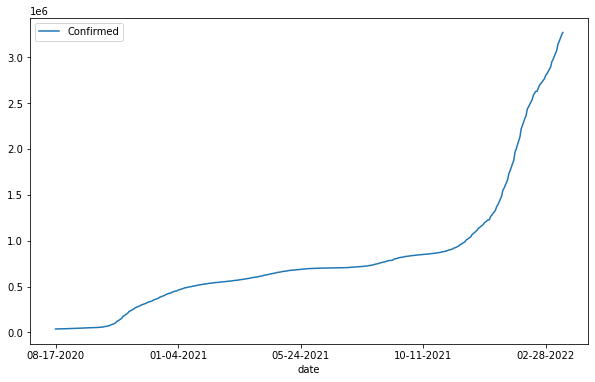

In [37]:
dfc=df[['date','Confirmed']]
dfc.plot(x='date',y='Confirmed', kind = 'line')	

In [50]:
dfc=dfc.diff().dropna()#####

In [51]:
dfc

,Confirmed
date,
2020-08-18,197.0
2020-08-19,311.0
2020-08-20,266.0
2020-08-21,306.0
2020-08-24,728.0
...,...
2022-03-14,69146.0
2022-03-15,29033.0
2022-03-16,36038.0


In [8]:
#dfc.loc[dfc["date"]=='11-29-2021']

In [47]:
dfc["date"]

0      08-17-2020
1      08-18-2020
2      08-19-2020
3      08-20-2020
4      08-21-2020
          ...    
410    03-14-2022
411    03-15-2022
412    03-16-2022
413    03-17-2022
414    03-18-2022
Name: date, Length: 415, dtype: object

In [10]:
#dfc.

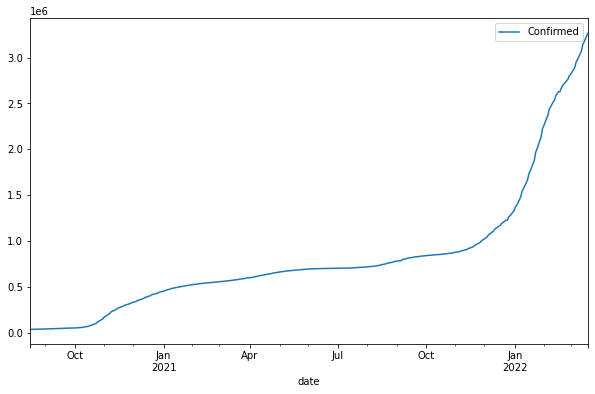

In [48]:
dfc['date']= pd.to_datetime(dfc['date'],infer_datetime_format=True)
dfc = dfc.set_index(['date'])
dfc.plot()

79

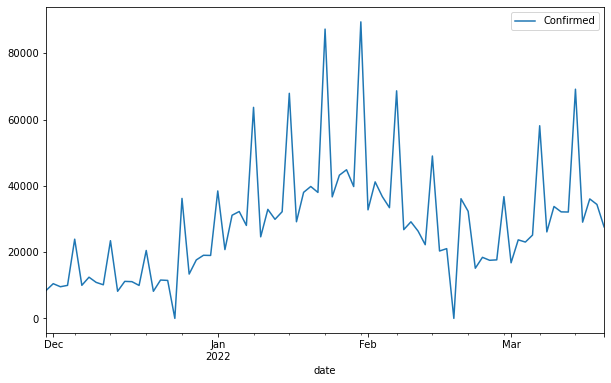

In [55]:
activecases.plot()
len(activecases)
#activecases

In [56]:
activecases

,Confirmed
date,
2021-11-30,8423.0
2021-12-01,10467.0
2021-12-02,9546.0
2021-12-03,9958.0
2021-12-06,23895.0
...,...
2022-03-14,69146.0
2022-03-15,29033.0
2022-03-16,36038.0


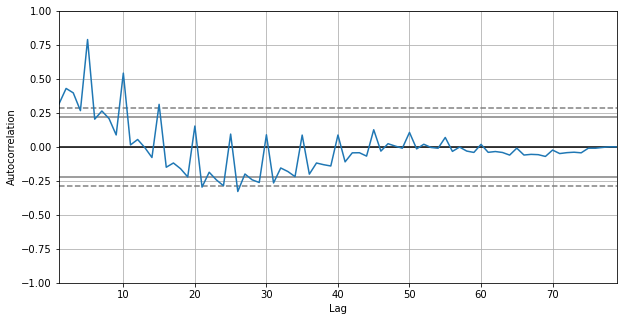

In [57]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(10, 5))
autocorrelation_plot(dfc[335:])

In [58]:
activecases=dfc[335:]

In [59]:
from statsmodels.tsa.stattools import adfuller
print("Results of Dickey-Fuller test for Original Time Series")
dftest = adfuller(activecases, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller test for Original Time Series
Test Statistic                 -2.874920
p-value                         0.048343
#Lags Used                      8.000000
Number of Observations Used    70.000000
Critical Value (1%)            -3.527426
Critical Value (5%)            -2.903811
Critical Value (10%)           -2.589320
dtype: float64


In [67]:
stationary=activecases
stationary

,Confirmed
date,
2021-11-30,8423.0
2021-12-01,10467.0
2021-12-02,9546.0
2021-12-03,9958.0
2021-12-06,23895.0
...,...
2022-03-14,69146.0
2022-03-15,29033.0
2022-03-16,36038.0


In [64]:
#
#log_series=np.log(activecases)
#print("Results of Dickey-Fuller test for Log Transformed Time-Series")

dftest = adfuller(activecases.diff().dropna())#adfuller((log_series.diff().diff()).dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)
#stationary=(log_series.diff().diff()).dropna()

Test Statistic                 -1.978493
p-value                         0.296082
#Lags Used                      8.000000
Number of Observations Used    69.000000
Critical Value (1%)            -3.528890
Critical Value (5%)            -2.904440
Critical Value (10%)           -2.589656
dtype: float64


In [65]:
dftest = adfuller(activecases.diff().diff().dropna())#adfuller((log_series.diff().diff()).dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                 -4.216927
p-value                         0.000617
#Lags Used                      7.000000
Number of Observations Used    69.000000
Critical Value (1%)            -3.528890
Critical Value (5%)            -2.904440
Critical Value (10%)           -2.589656
dtype: float64


ValueError: could not convert string to float: '11-29-2021'

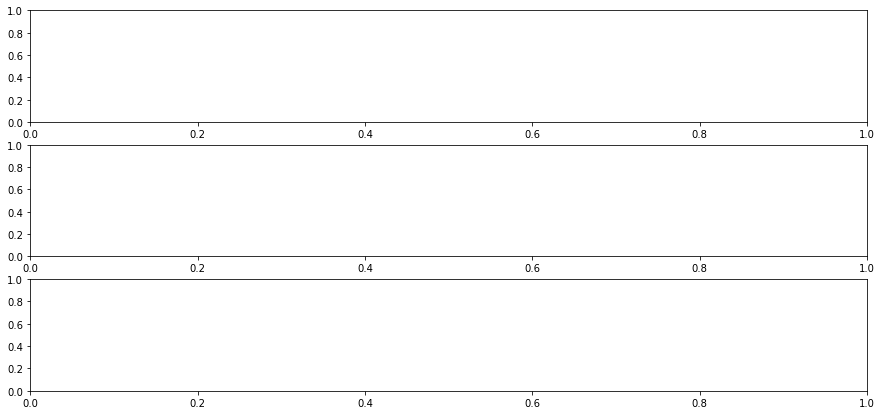

In [19]:
fig, (ax1,ax2,ax3) = plt.subplots(3, 1,figsize=(15,7))
import statsmodels.api as sm
results=sm.tsa.seasonal_decompose(stationary)
fig.tight_layout()
ax1.plot(results.trend)
ax2.plot(results.seasonal)
ax3.plot(results.resid)
ax1.title.set_text('trend')
ax2.title.set_text('seasonal')
ax3.title.set_text('resid')

In [68]:
train_ml=activecases.iloc[:int(len(activecases)*0.70)]
valid_ml=activecases.iloc[int(len(activecases)*0.70):]

trainActiveCases =activecases.iloc[:int(len(activecases)*0.70)]
validActiveCases=activecases.iloc[int(len(activecases)*0.70):]

In [69]:
#type(trainActiveCases["Confirmed"])
#trainActiveCases
#validActiveCases["Confirmed"]
#len(prediction_ar)
#pd.Series(prediction_ar,validActiveCases["Confirmed"].index)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


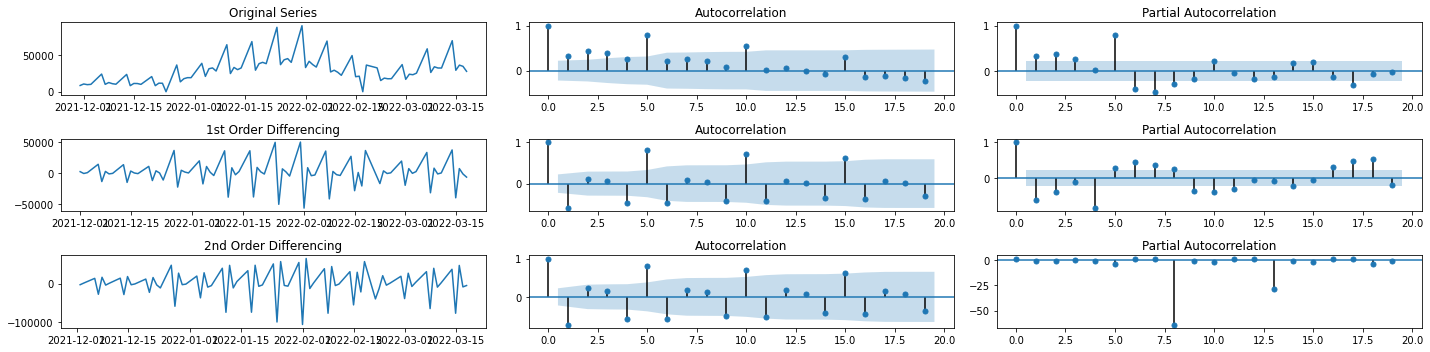

In [70]:
# Original Series
fig, axes = plt.subplots(3, 3,figsize=(20,5))  
axes[0, 0].plot(activecases["Confirmed"]); axes[0, 0].set_title('Original Series')
plot_acf(activecases["Confirmed"], ax=axes[0, 1])
plot_pacf(activecases["Confirmed"], ax=axes[0, 2])#
# 1st Differencing
axes[1, 0].plot(activecases["Confirmed"].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(activecases["Confirmed"].diff().dropna(), ax=axes[1, 1])
plot_pacf(activecases["Confirmed"].diff().dropna(), ax=axes[1, 2])#
# 2nd Differencing
axes[2, 0].plot(activecases["Confirmed"].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(activecases["Confirmed"].diff().diff().dropna(), ax=axes[2, 1])
plot_pacf(activecases["Confirmed"].diff().diff().dropna(), ax=axes[2, 2])#
plt.tight_layout()
plt.show()

In [71]:
#AR

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


                              ARMA Model Results                              
Dep. Variable:              Confirmed   No. Observations:                   55
Model:                     ARMA(5, 0)   Log Likelihood                -578.013
Method:                       css-mle   S.D. of innovations           8290.674
Date:                Mon, 02 May 2022   AIC                           1170.026
Time:                        16:53:13   BIC                           1184.078
Sample:                    11-30-2021   HQIC                          1175.460
                         - 02-14-2022                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.606e+04        nan        nan        nan         nan         nan
ar.L1.Confirmed     0.1095      0.071      1.548      0.122      -0.029       0.248
ar.L2.Confirmed     0.1133      

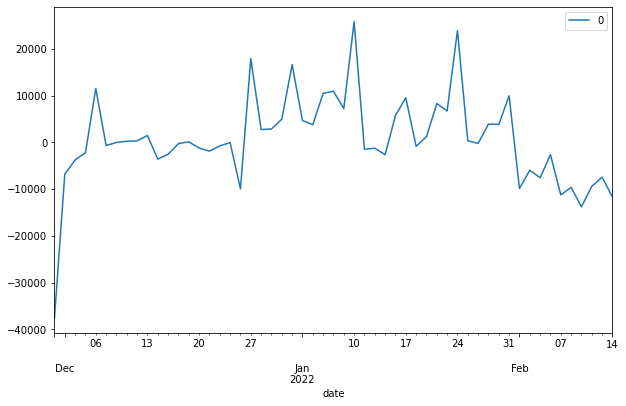

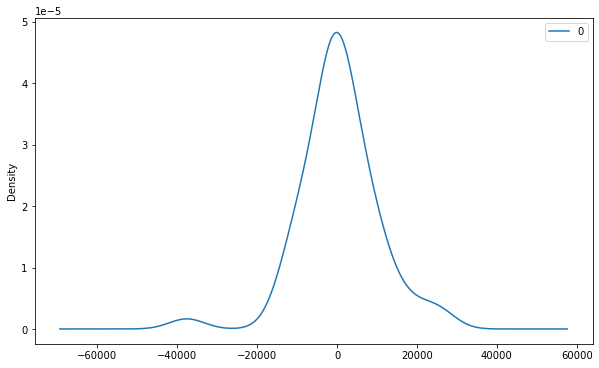

                  0
count     55.000000
mean     520.550687
std     9810.660843
min   -37638.623825
25%    -3113.368463
50%      -48.899650
75%     4835.124713
max    25853.586349
Root Mean Square Error for AR Model:  12471.393944925603


In [74]:
model_ar = ARIMA(trainActiveCases, order=(5, 0, 0))  
model_ar_fit = model_ar.fit()  

prediction_ar=model_ar_fit.forecast(len(validActiveCases))[0]

print(model_ar_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_ar_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

#model_scores.append(np.sqrt(mean_squared_error(validActiveCases,prediction_ar)))
print("Root Mean Square Error for AR Model: ",np.sqrt(mean_squared_error(validActiveCases,prediction_ar)))

Text(0.5, 1.0, 'Confirmed Cases AR Model Forecasting')

<Figure size 720x360 with 0 Axes>

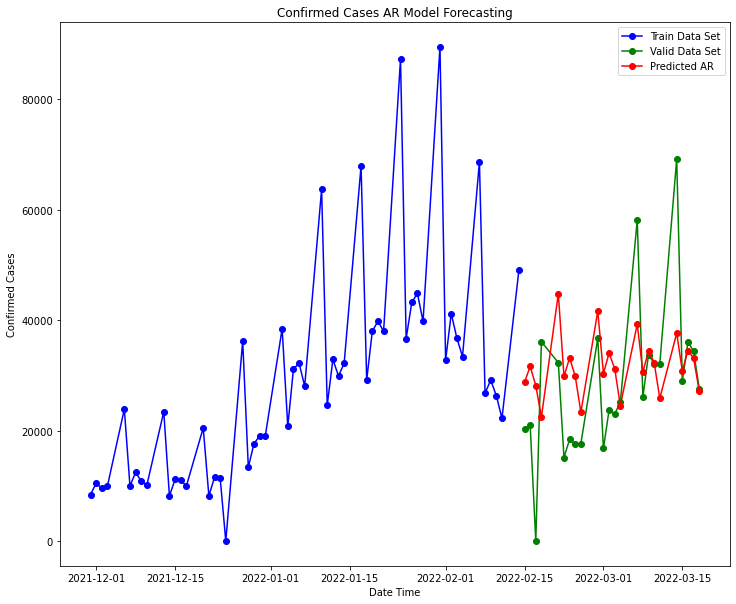

In [75]:

plt.figure(figsize=(10,5))
f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(trainActiveCases["Confirmed"], marker='o',color='blue',label ="Train Data Set")
plt.plot(validActiveCases["Confirmed"], marker='o',color='green',label ="Valid Data Set")
plt.plot(pd.Series(prediction_ar,validActiveCases["Confirmed"].index), marker='o',color='red',label ="Predicted AR")
plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases AR Model Forecasting")

In [76]:
#MA

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


                              ARMA Model Results                              
Dep. Variable:              Confirmed   No. Observations:                   55
Model:                     ARMA(0, 1)   Log Likelihood                -617.791
Method:                       css-mle   S.D. of innovations          18271.359
Date:                Mon, 02 May 2022   AIC                           1241.583
Time:                        16:53:25   BIC                           1247.605
Sample:                    11-30-2021   HQIC                          1243.911
                         - 02-14-2022                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.874e+04   3045.266      9.436      0.000    2.28e+04    3.47e+04
ma.L1.Confirmed     0.2404      0.114      2.110      0.035       0.017       0.464
                                

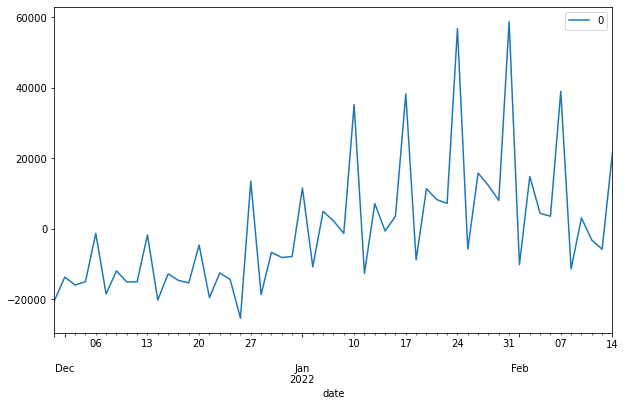

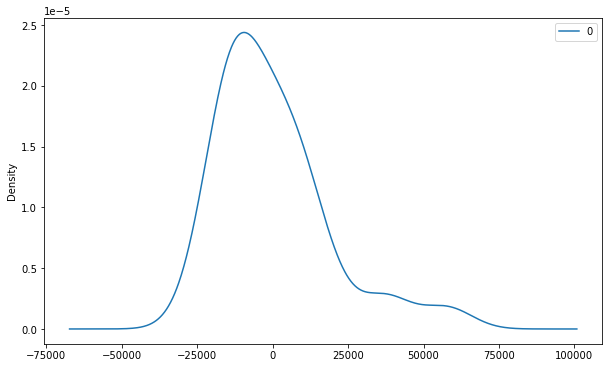

                  0
count     55.000000
mean      72.164275
std    18451.251577
min   -25302.901031
25%   -13188.174297
50%    -4575.248701
75%     7672.759405
max    58783.845465
Root Mean Square Error for MA Model:  13834.34363426805


In [77]:
model_ma = ARIMA(trainActiveCases, order=(0, 0, 1))  
model_ma_fit = model_ma.fit()  

prediction_ma=model_ma_fit.forecast(len(validActiveCases))[0]

print(model_ma_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_ma_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

print("Root Mean Square Error for MA Model: ",np.sqrt(mean_squared_error(validActiveCases,prediction_ma)))


Text(0.5, 1.0, 'Confirmed Cases MA Model Forecasting')

<Figure size 720x360 with 0 Axes>

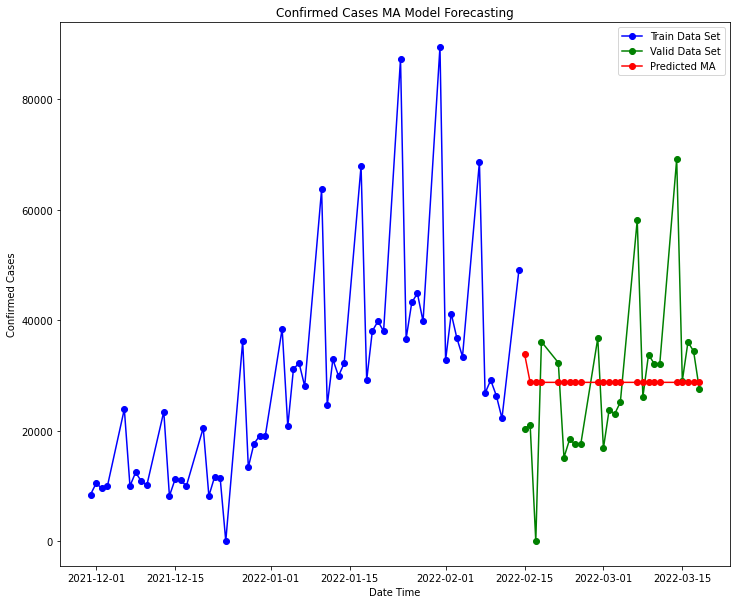

In [78]:

plt.figure(figsize=(10,5))
f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(trainActiveCases["Confirmed"], marker='o',color='blue',label ="Train Data Set")
plt.plot(validActiveCases["Confirmed"], marker='o',color='green',label ="Valid Data Set")
plt.plot(pd.Series(prediction_ma,validActiveCases["Confirmed"].index), marker='o',color='red',label ="Predicted MA")
plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases MA Model Forecasting")

In [79]:
#ARIMA

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
<ipython-input-81-f6ad16644f05>:6: RuntimeWarning: overflow encountered in exp
  valid_ml["ARIMA Model Prediction"]=list(np.exp(prediction_arima))
<ipython-input-81-f6ad16644f05>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_ml["ARIMA Model Prediction"]=list(np.exp(prediction_arima))


                              ARMA Model Results                              
Dep. Variable:              Confirmed   No. Observations:                   55
Model:                     ARMA(5, 1)   Log Likelihood                -573.011
Method:                       css-mle   S.D. of innovations           7613.431
Date:                Mon, 02 May 2022   AIC                           1162.021
Time:                        16:53:57   BIC                           1178.080
Sample:                    11-30-2021   HQIC                          1168.231
                         - 02-14-2022                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.398e+04   1.05e+04      2.284      0.022    3400.309    4.46e+04
ar.L1.Confirmed     0.0004      0.075      0.006      0.995      -0.147       0.148
ar.L2.Confirmed     0.1112      

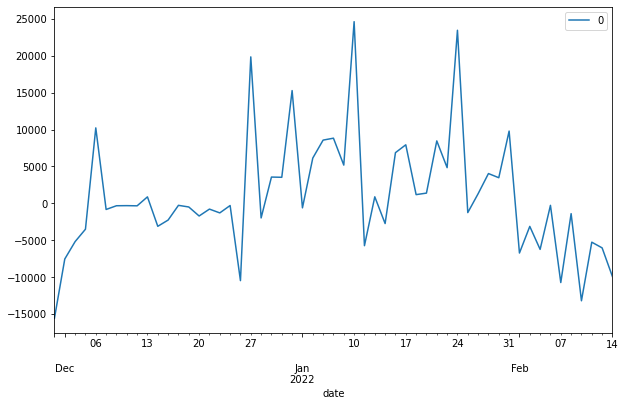

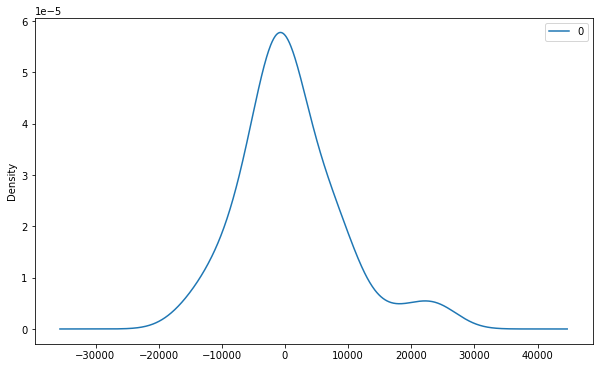

                  0
count     55.000000
mean     921.649780
std     8025.951846
min   -15552.685655
25%    -3115.957387
50%     -325.242268
75%     4433.809140
max    24606.009784
Root Mean Square Error for MA Model:  11702.249308413904


In [81]:
model_arima = ARIMA(trainActiveCases, order=(5, 0, 1))  
model_arima_fit = model_arima.fit()  


prediction_arima=model_arima_fit.forecast(len(validActiveCases))[0]
valid_ml["ARIMA Model Prediction"]=list(np.exp(prediction_arima))

print(model_arima_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_arima_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

print("Root Mean Square Error for MA Model: ",np.sqrt(mean_squared_error(validActiveCases,prediction_arima)))

Text(0.5, 1.0, 'Confirmed Cases ARIMA Model Forecasting')

<Figure size 720x360 with 0 Axes>

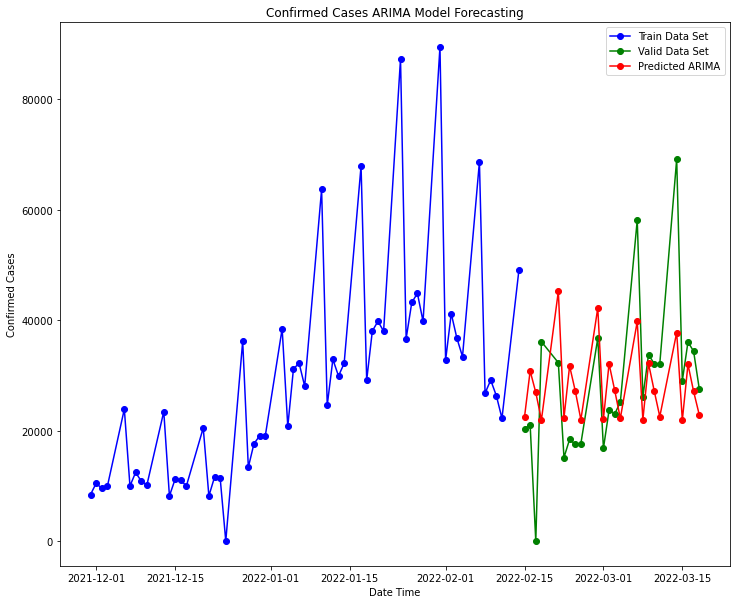

In [82]:
plt.figure(figsize=(10,5))
f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(trainActiveCases["Confirmed"], marker='o',color='blue',label ="Train Data Set")
plt.plot(validActiveCases["Confirmed"], marker='o',color='green',label ="Valid Data Set")
plt.plot(pd.Series(prediction_arima,validActiveCases["Confirmed"].index), marker='o',color='red',label ="Predicted ARIMA")
plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases ARIMA Model Forecasting")

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-91-4e1386103cab>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_ml["SARIMA Model Prediction"]=list(np.exp(prediction_sarima))


                               SARIMAX Results                                
Dep. Variable:              Confirmed   No. Observations:                   55
Model:               SARIMAX(5, 0, 1)   Log Likelihood                -519.895
Date:                Mon, 02 May 2022   AIC                           1053.789
Time:                        16:56:25   BIC                           1067.174
Sample:                    11-30-2021   HQIC                          1058.886
                         - 02-14-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0080      0.149      0.054      0.957      -0.283       0.300
ar.L2          0.1210      0.118      1.028      0.304      -0.110       0.352
ar.L3          0.0529      0.119      0.443      0.6

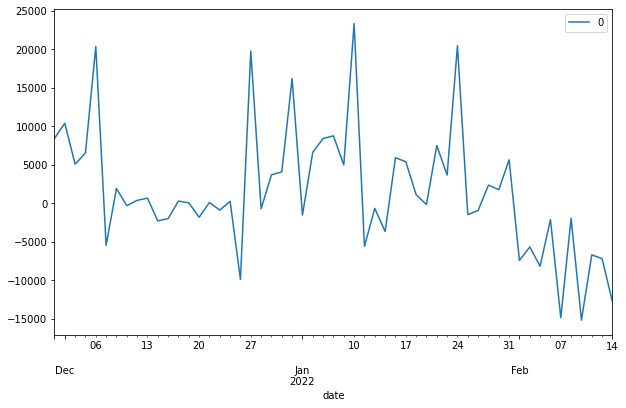

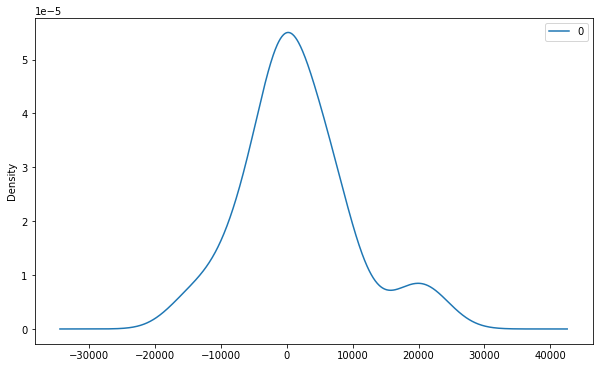

                  0
count     55.000000
mean    1540.714205
std     8208.372757
min   -15177.042480
25%    -2045.988551
50%      257.775449
75%     5517.568125
max    23322.412249
(24, 1)


In [91]:
model_sarima = sm.tsa.statespace.SARIMAX(trainActiveCases, order=(5, 0, 1), seasonal_order=(0,0,0,12),
                                 enforce_stationarity=False, enforce_invertibility=False)
model_sarima_fit = model_sarima.fit()  


prediction_sarima=model_sarima_fit.forecast(np.shape(validActiveCases)[0])
valid_ml["SARIMA Model Prediction"]=list(np.exp(prediction_sarima))

print(model_sarima_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_sarima_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

print(np.shape(validActiveCases))

In [92]:
print(np.shape(prediction_sarima[1:]))
print(np.shape(validActiveCases))
#model_scores.append(np.sqrt(mean_squared_error(validActiveCases,prediction_sarima)))
print("Root Mean Square Error for SARIMA Model: ",np.sqrt(mean_squared_error(validActiveCases,prediction_sarima)))

(23,)
(24, 1)
Root Mean Square Error for SARIMA Model:  11071.950826754923


Text(0.5, 1.0, 'Confirmed Cases SARIMA Model Forecasting')

<Figure size 720x360 with 0 Axes>

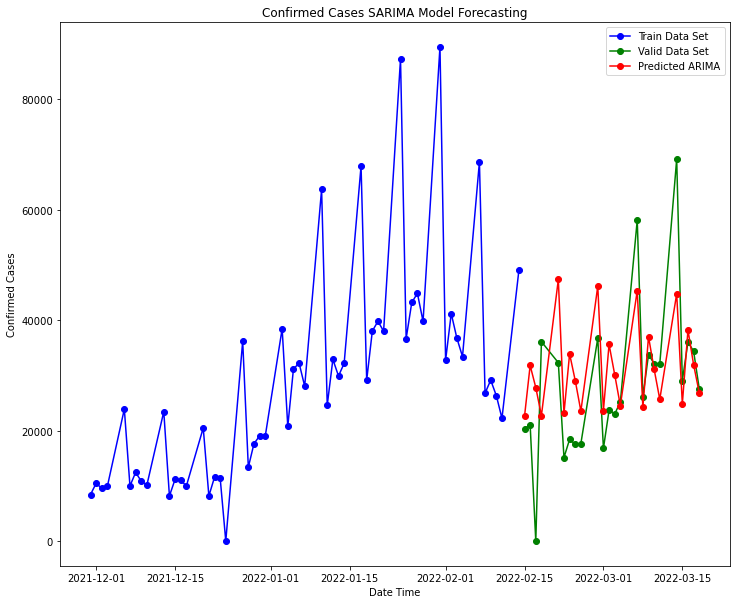

In [93]:
plt.figure(figsize=(10,5))
f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(trainActiveCases["Confirmed"], marker='o',color='blue',label ="Train Data Set")
plt.plot(validActiveCases["Confirmed"], marker='o',color='green',label ="Valid Data Set")
plt.plot(pd.Series(prediction_sarima,validActiveCases["Confirmed"].index), marker='o',color='red',label ="Predicted ARIMA")
plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases SARIMA Model Forecasting")

In [ ]:
#Auto-ARIMA models - AR, MA, ARIMA and SARIMA

In [ ]:
# Original Series
fig, axes = plt.subplots(3, 3,figsize=(20,5))  
axes[0, 0].plot(activecases["Confirmed"]); axes[0, 0].set_title('Original Series')
plot_acf(activecases["Confirmed"], ax=axes[0, 1])
plot_pacf(activecases["Confirmed"], ax=axes[0, 2])#
# 1st Differencing
axes[1, 0].plot(activecases["Confirmed"].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(activecases["Confirmed"].diff().dropna(), ax=axes[1, 1])
plot_pacf(activecases["Confirmed"].diff().dropna(), ax=axes[1, 2])#
# 2nd Differencing
axes[2, 0].plot(activecases["Confirmed"].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(activecases["Confirmed"].diff().diff().dropna(), ax=axes[2, 1])
plot_pacf(activecases["Confirmed"].diff().diff().dropna(), ax=axes[2, 2])#
plt.tight_layout()
plt.show()

In [ ]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(activecases["Confirmed"], label='Original Series')
axes[0].plot(activecases["Confirmed"].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(activecases["Confirmed"], label='Original Series')
axes[1].plot(activecases["Confirmed"].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Number of daily confirmed cases', fontsize=16)
plt.show()

In [97]:
#pip install pmdarima

In [96]:
from pmdarima.arima import auto_arima

In [ ]:
model_ar= auto_arima(trainActiveCases,trace=True, error_action='ignore', start_p=0,start_q=0,max_p=5,max_q=0,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_ar_fit = model_ar.fit(trainActiveCases)
prediction_ar=model_ar_fit.predict(len(validActiveCases))

print(model_ar_fit.summary())
plt.figure(figsize=(10,10))
# plot residual errors
residuals = pd.DataFrame(model_ar_fit.resid())
model_ar_fit.plot_diagnostics()
plt.show()
residuals.plot(kind='kde')
plt.show()

In [ ]:
print("Root Mean Square Error for Auto ARIMA AR Model: ",np.sqrt(mean_squared_error(validActiveCases,prediction_ar)))

In [ ]:
plt.figure(figsize=(10,5))
f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(trainActiveCases["Confirmed"], marker='o',color='blue',label ="Train Data Set")
plt.plot(validActiveCases["Confirmed"], marker='o',color='green',label ="Valid Data Set")
plt.plot(pd.Series(prediction_ar,validActiveCases["Confirmed"].index), marker='o',color='red',label ="Predicted AR")
plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases  Auto AR Model Forecasting")

In [ ]:
validActiveCases["Confirmed"].tail()

In [ ]:
validActiveCases["Confirmed"].index[0]

In [ ]:
# Forecast to today
n_periods = 31
fc, confint = model_ar_fit.predict(n_periods=n_periods, return_conf_int=True)
valid_index = pd.date_range(start=validActiveCases["Confirmed"].index[0], periods=n_periods, freq='D')


train_active =  trainActiveCases["Confirmed"]

# make series for plotting purpose
fc_series = pd.Series(fc, index=valid_index)

lower_series = pd.Series(confint[:, 0], index=valid_index)
upper_series = pd.Series(confint[:, 1], index=valid_index)

# Plot
f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(train_active, color='blue')
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final AR Forecast of  Maharashtra")
plt.show()

In [ ]:
#我们选择前40天数据
indexedDataset =dfc
rolmean = indexedDataset.rolling(window=7).mean() #以星期为单位给出滚动平均值
rolstd = indexedDataset.rolling(window=7).std()#以星期为单位给出滚动标准差
#print(rolmean,rolstd)

#Plot rolling statistics

#设置画布大小
plt.figure(figsize=(15,5),dpi = 80)
#横轴坐标旋转45°
plt.xticks(rotation=45)

orig = plt.plot(indexedDataset['Confirmed'], color='blue', label='Original')#原数据
mean = plt.plot(rolmean, color='red', label='Rolling Mean')#平均值
std = plt.plot(rolstd, color='black', label='Rolling Std')#标准差

plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
fc[-1] #3619590 actual

In [ ]:
#Auto ARIMA Model

In [ ]:
#augmented Dickey-Fuller test
plt.plot(trainActiveCases)
from statsmodels.tsa.stattools import adfuller
adfuller(trainActiveCases)
#Test statistic:-1.323288044884909,
#P-value:0.618451812489474,not less than .05, we fail to reject the null hypothesis.(H0: The time series is non-stationar)



 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1232.961, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1199.318, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1192.987, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1212.129, Time=0.03 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1214.508, Time=0.05 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1213.539, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1210.866, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1198.887, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1202.239, Time=0.04 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1198.542, Time=0.04 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1203.508, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1204.217, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1199.730, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1195.091, Time=0.04 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1190.588, Time=0.18 sec
 ARIMA(3,1

<Figure size 720x720 with 0 Axes>

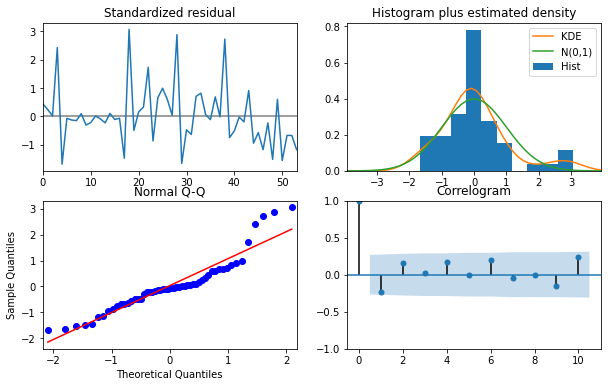

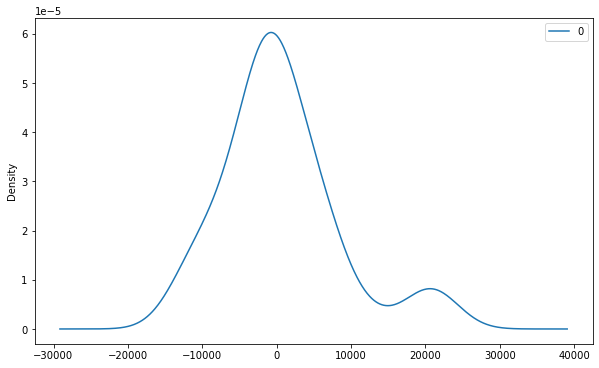

In [104]:
model_arima= auto_arima(trainActiveCases,trace=True, error_action='ignore',start_p=1,start_q=1,max_p=5,max_q=5,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_arima_fit = model_arima.fit(trainActiveCases)
prediction_autoarima=model_arima_fit.predict(len(validActiveCases))

print(model_arima_fit.summary())
plt.figure(figsize=(10,10))
# plot residual errors
residuals = pd.DataFrame(model_arima_fit.resid())
model_arima_fit.plot_diagnostics()
plt.show()
residuals.plot(kind='kde')
plt.show()

In [105]:
print("Root Mean Square Error for Auto ARIMA Model: ",np.sqrt(mean_squared_error(validActiveCases,prediction_autoarima)))

Root Mean Square Error for Auto ARIMA Model:  10099.963262305444


Text(0.5, 1.0, 'Confirmed Cases  Auto AR Model Forecasting')

<Figure size 720x360 with 0 Axes>

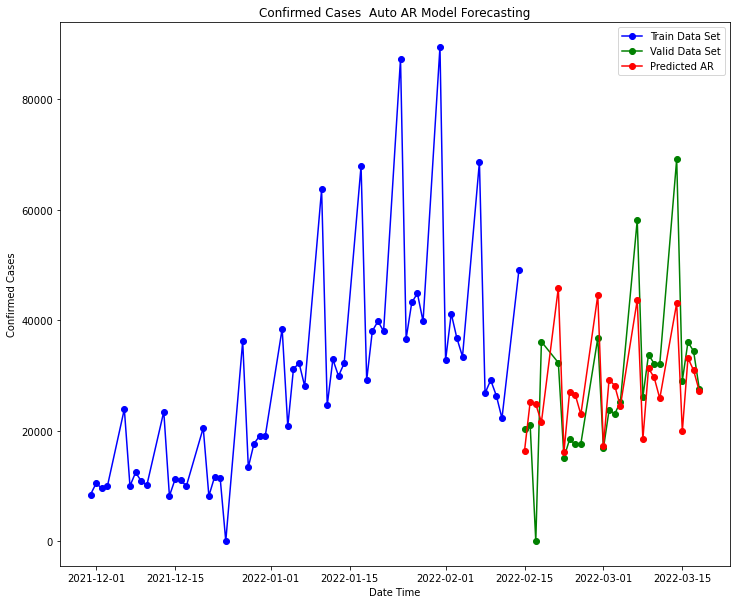

In [106]:
plt.figure(figsize=(10,5))
f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(trainActiveCases["Confirmed"], marker='o',color='blue',label ="Train Data Set")
plt.plot(validActiveCases["Confirmed"], marker='o',color='green',label ="Valid Data Set")
plt.plot(pd.Series(prediction_autoarima,validActiveCases["Confirmed"].index), marker='o',color='red',label ="Predicted AR")
plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases  Auto AR Model Forecasting")

In [107]:
#Auto SARIMA Model

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1234.475, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1232.961, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1211.049, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1200.871, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1231.038, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1199.318, Time=0.06 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1203.071, Time=0.04 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1198.887, Time=0.02 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=1198.303, Time=0.04 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=1198.797, Time=0.26 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=1199.431, Time=0.08 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1197.443, Time=0.05 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=1199.245, Time=0.12 sec
 ARIMA(1,1,1)(1,0,2)[12]

<Figure size 720x720 with 0 Axes>

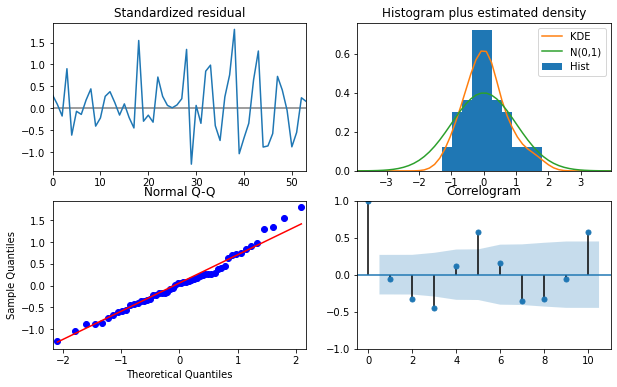

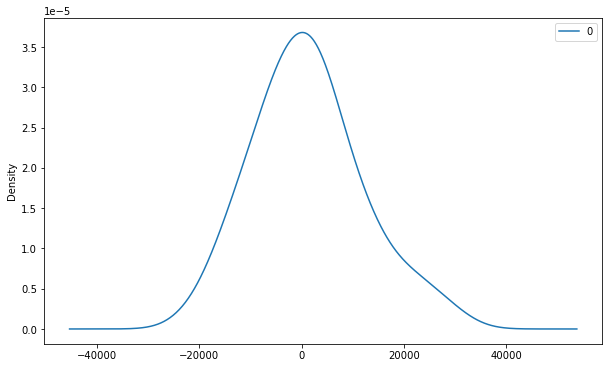

In [111]:
model_sarima= auto_arima(trainActiveCases,trace=True, error_action='ignore', 
                         start_p=0,start_q=0,max_p=5,max_q=5,m=12,
                   suppress_warnings=True,stepwise=True,seasonal=True)
model_sarima_fit = model_sarima.fit(trainActiveCases)
prediction_autosarima=model_sarima_fit.predict(len(validActiveCases))

print(model_sarima_fit.summary())
plt.figure(figsize=(10,10))
# plot residual errors
residuals = pd.DataFrame(model_sarima_fit.resid())
model_sarima_fit.plot_diagnostics()
plt.show()
residuals.plot(kind='kde')
plt.show()

In [112]:
print("Root Mean Square Error for Auto SARIMA Model: ",np.sqrt(mean_squared_error(validActiveCases,prediction_autosarima)))

Root Mean Square Error for Auto SARIMA Model:  13276.321193590442


Text(0.5, 1.0, 'Confirmed Cases  Auto AR Model Forecasting')

<Figure size 720x360 with 0 Axes>

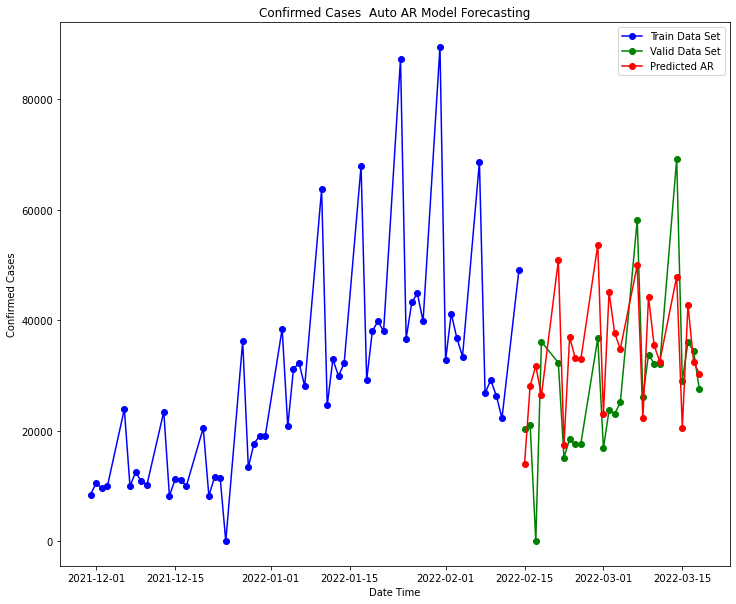

In [113]:
plt.figure(figsize=(10,5))
f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(trainActiveCases["Confirmed"], marker='o',color='blue',label ="Train Data Set")
plt.plot(validActiveCases["Confirmed"], marker='o',color='green',label ="Valid Data Set")
plt.plot(pd.Series(prediction_autosarima,validActiveCases["Confirmed"].index), marker='o',color='red',label ="Predicted AR")
plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases  Auto AR Model Forecasting")

Text(0.5, 1.0, 'Cumulative Confirmed Cases AR Model Forecasting')

<Figure size 720x360 with 0 Axes>

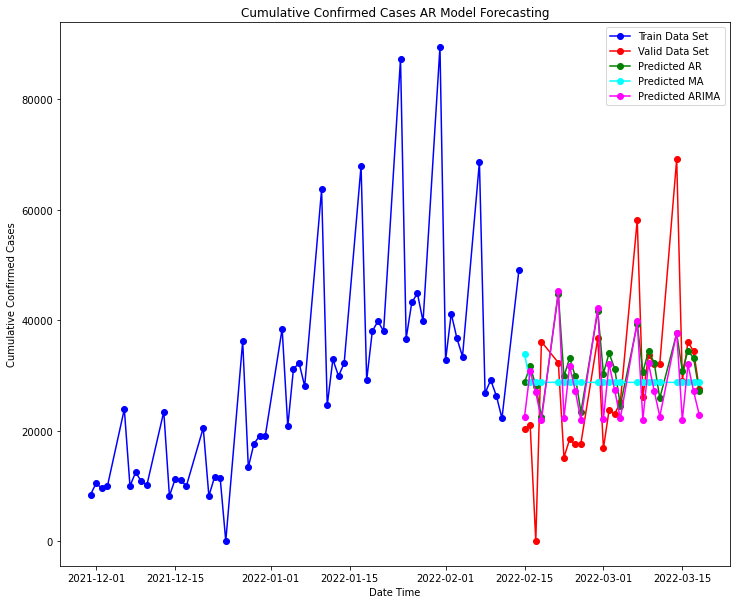

In [121]:
plt.figure(figsize=(10,5))
f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(trainActiveCases["Confirmed"], marker='o',color='blue',label ="Train Data Set")
plt.plot(validActiveCases["Confirmed"], marker='o',color='red',label ="Valid Data Set")
plt.plot(pd.Series(prediction_ar,validActiveCases["Confirmed"].index), marker='o',color='green',label ="Predicted AR")
plt.plot(pd.Series(prediction_ma,validActiveCases["Confirmed"].index), marker='o',color='cyan',label ="Predicted MA")
plt.plot(pd.Series(prediction_arima,validActiveCases["Confirmed"].index), marker='o',color='magenta',label ="Predicted ARIMA")
#plt.plot(pd.Series(prediction_sarima,validActiveCases["Confirmed"].index), marker='o',color=(1,1,0,1),label ="Predicted  SARIMA")
#plt.plot(pd.Series(prediction_autoarima,validActiveCases["Confirmed"].index), marker='o',color='black',label ="Predicted auto-ARIMA")
#plt.plot(pd.Series(prediction_autosarima,validActiveCases["Confirmed"].index), marker='o',color=(0,1,0,1),label ="Predicted auto-SARIMA")
plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Cumulative Confirmed Cases')
plt.title("Cumulative Confirmed Cases AR Model Forecasting")

Text(0.5, 1.0, 'Cumulative Confirmed Cases AR Model Forecasting')

<Figure size 720x360 with 0 Axes>

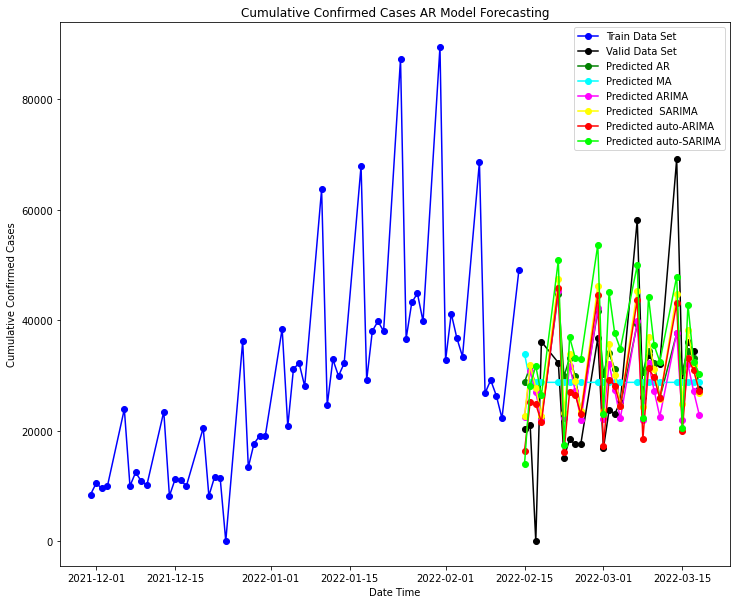

In [128]:
plt.figure(figsize=(10,5))
f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(trainActiveCases["Confirmed"], marker='o',color='blue',label ="Train Data Set")
plt.plot(validActiveCases["Confirmed"], marker='o',color='black',label ="Valid Data Set")
plt.plot(pd.Series(prediction_ar,validActiveCases["Confirmed"].index), marker='o',color='green',label ="Predicted AR")
plt.plot(pd.Series(prediction_ma,validActiveCases["Confirmed"].index), marker='o',color='cyan',label ="Predicted MA")
plt.plot(pd.Series(prediction_arima,validActiveCases["Confirmed"].index), marker='o',color='magenta',label ="Predicted ARIMA")
plt.plot(pd.Series(prediction_sarima,validActiveCases["Confirmed"].index), marker='o',color=(1,1,0,1),label ="Predicted  SARIMA")
plt.plot(pd.Series(prediction_autoarima,validActiveCases["Confirmed"].index), marker='o',color='red',label ="Predicted auto-ARIMA")
plt.plot(pd.Series(prediction_autosarima,validActiveCases["Confirmed"].index), marker='o',color=(0,1,0,1),label ="Predicted auto-SARIMA")
plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Cumulative Confirmed Cases')
plt.title("Cumulative Confirmed Cases AR Model Forecasting")

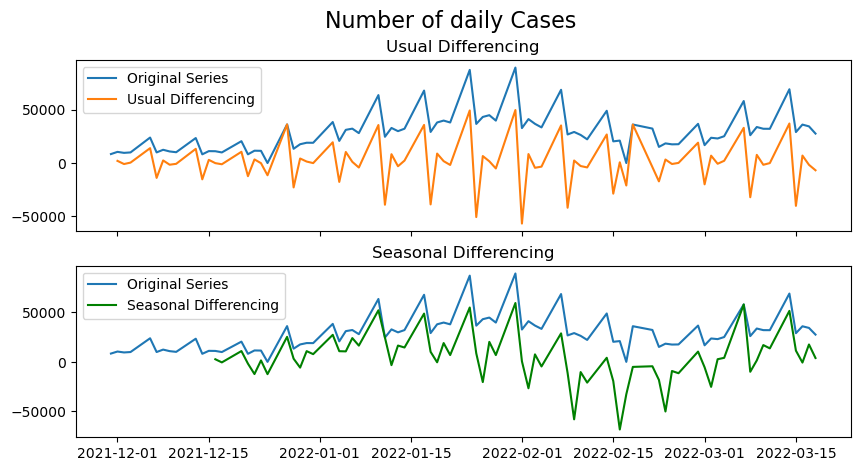

In [130]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(activecases["Confirmed"], label='Original Series')
axes[0].plot(activecases["Confirmed"].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(activecases["Confirmed"], label='Original Series')
axes[1].plot(activecases["Confirmed"].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Number of daily Cases', fontsize=16)
plt.show()

In [126]:
#Prophet Model from Facebook

In [ ]:
from prophet import Prophet

In [ ]:
print('Results of Dickey Fuller Test:')
dftest = adfuller(indexedDataset['Confirmed'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

In [ ]:
from scipy import stats

In [ ]:
#augmented Dickey-Fuller test
#plt.plot(trainActiveCases)
from statsmodels.tsa.stattools import adfuller
adfuller(trainActiveCases)
#Test statistic:-1.323288044884909,
#P-value:0.618451812489474,not less than .05, we fail to reject the null hypothesis.(H0: The time series is non-stationary)

#make a time series stationary using adjustments and transformations
#Power Transformations # Random exponential data is still stationary.?
A=np.sqrt(trainActiveCases).diff().dropna()
plt.plot(A)
adfuller(A)
#Test statistic:-1.9130474130855328,
#P-value:0.32594830917237183,not less than .05, we fail to reject the null hypothesis.(H0: The time series is non-stationary)


In [ ]:
#构建稳定性检验函数
def test_stationarity(timeseries):  
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()  #滑动平均值
    movingSTD = timeseries.rolling(window=12).std()     #滑动标准差
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.xticks(rotation=45)
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:   Augmented Dickey–Fuller ADF稳定性检验
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Confirmed'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [ ]:
#Estimating trend 估计趋势
indexedDataset_logScale = np.log(dfo)  #taking log 
plt.plot(indexedDataset_logScale)

In [ ]:
##Differencing--差分
##这里采用的是一阶差分：一阶差分就是离散函数中连续相邻两项之差。
datasetLogDiffShifting_1 = indexedDataset_logScale - indexedDataset_logScale.shift()
#plt.plot(datasetLogDiffShifting_1)

#二阶差分：二阶差分就是一阶差分再进行一次差分。
#注：以下内容可以看出，二阶差分后数据已经稳定，所以ARIMA模型参数d=2。
datasetLogDiffShifting_2 = datasetLogDiffShifting_1 - datasetLogDiffShifting_1.shift()
#plt.plot(datasetLogDiffShifting_2)
datasetLogDiffShifting_3 = datasetLogDiffShifting_2 - datasetLogDiffShifting_2.shift()
plt.plot(datasetLogDiffShifting_3)

In [ ]:
datasetLogDiffShifting_1.dropna(inplace=True)#滤除缺失数据。
test_stationarity(datasetLogDiffShifting_1)

In [ ]:
datasetLogDiffShifting_2.dropna(inplace=True)#滤除缺失数据。
test_stationarity(datasetLogDiffShifting_2)

In [ ]:
datasetLogDiffShifting_3.dropna(inplace=True)#滤除缺失数据。
test_stationarity(datasetLogDiffShifting_3)

In [ ]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))

#acf   from statsmodels.tsa.stattools import acf, pacf
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(datasetLogDiffShifting_1, lags=10,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout();

#pacf
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(datasetLogDiffShifting_1, lags=10, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout();
#下图中的阴影表示置信区间，可以看出不同阶数自相关性的变化情况，从而选出p值和q值

In [ ]:
plt.figure(figsize=(10,5))
f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(trainActiveCases["Confirmed"], marker='o',color='blue',label ="Train Data Set")
plt.plot(validActiveCases["Confirmed"], marker='o',color='green',label ="Valid Data Set")
plt.plot(pd.Series(prediction_ar,validActiveCases["Confirmed"].index), marker='o',color='red',label ="Predicted AR")
plt.plot(pd.Series(prediction_ma,validActiveCases["Confirmed"].index), marker='o',color='cyan',label ="Predicted MA")
plt.plot(pd.Series(prediction_arima,validActiveCases["Confirmed"].index), marker='o',color='magenta',label ="Predicted ARIMA")
plt.plot(pd.Series(prediction_sarima,validActiveCases["Confirmed"].index), marker='o',color='yellow',label ="Predicted  SARIMA")
plt.plot(pd.Series(prediction_autoarima,validActiveCases["Confirmed"].index), marker='o',color='red',label ="Predicted AR")
#plt.plot(pd.Series(prediction_ar,validActiveCases["Confirmed"].index), marker='o',color='red',label ="Predicted AR")
plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Cumulative Confirmed Cases')
plt.title("Daily Confirmed Cases Forecasting")